In [1]:
from astroquery.vizier import Vizier
import pandas as pd

# Без ограничения на количество строк
Vizier.ROW_LIMIT = -1

# ID таблицы
catalog_id = "J/A+A/691/A6/tablea1"

# Загрузка таблицы
result = Vizier.get_catalogs(catalog_id)

# Преобразуем в pandas DataFrame
df = result[0].to_pandas()

# Показать первые строки
print(df.head())

# Показать список всех колонок
print("\nНазвания колонок:")
print(df.columns.tolist())

  Sample  GId  N     RAJ2000  DEJ2000         z         Rij         mu  \
0   m0V5    1  3  174.636993    0.734  0.106363   73.663002  25.105000   
1   m0V5    2  3  175.524002    0.804  0.286111   84.747002  25.975000   
2   m0V5    3  3  176.223999    0.706  0.235208   90.141998  25.729000   
3   m0V5    4  3  176.912003    0.773  0.295623  117.499001  26.299999   
4   m0V5    5  3  179.164001    0.715  0.269045   80.971001  25.143000   

    sigmav    tcr      rbmag      rfmag      r1MAG      r2MAG  
0  162.689  0.041  16.898001  17.684000 -20.889000 -20.420000  
1  321.055  0.024  19.007999  19.677000 -21.261000 -20.996000  
2   91.119  0.090  18.702000  19.674000 -21.059000 -20.518999  
3  210.422  0.051  19.476999  19.690001 -20.936001 -20.792999  
4  334.073  0.022  18.857000  19.336000 -21.358000 -20.947001  

Названия колонок:
['Sample', 'GId', 'N', 'RAJ2000', 'DEJ2000', 'z', 'Rij', 'mu', 'sigmav', 'tcr', 'rbmag', 'rfmag', 'r1MAG', 'r2MAG']


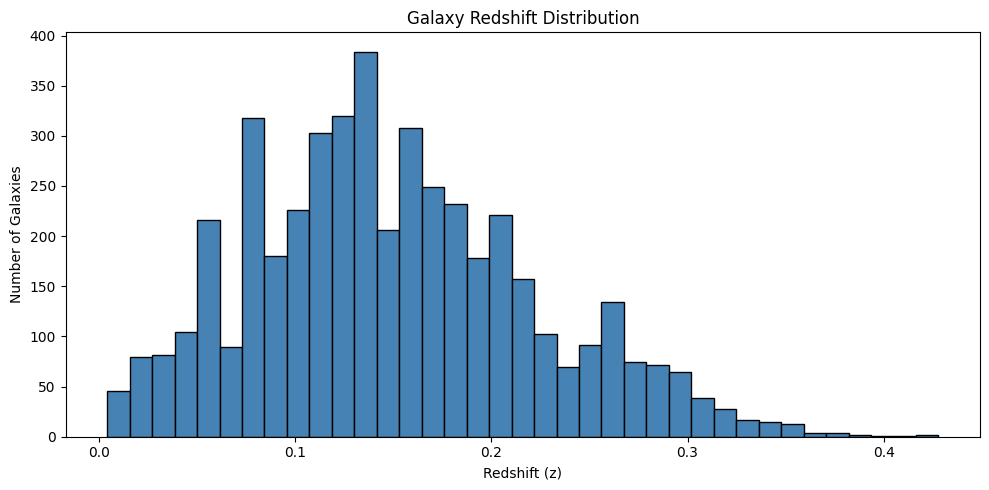

In [2]:
from astroquery.vizier import Vizier
import pandas as pd
import matplotlib.pyplot as plt

# Снимаем ограничение на количество строк
Vizier.ROW_LIMIT = -1

# Загружаем таблицу tablea1
catalog_id = "J/A+A/691/A6/tablea1"
result = Vizier.get_catalogs(catalog_id)
df = result[0].to_pandas()

# Находим колонку с красным смещением
z_col = next(col for col in df.columns if 'z' in col.lower())

# Очищаем от NaN
z_values = df[z_col].dropna()

# Строим гистограмму
plt.figure(figsize=(10, 5))
plt.hist(z_values, bins='fd', color='steelblue', edgecolor='black')  # 'fd' = Freedman–Diaconis rule
plt.xlabel('Redshift (z)')
plt.ylabel('Number of Galaxies')
plt.title('Galaxy Redshift Distribution')
plt.tight_layout()
plt.show()

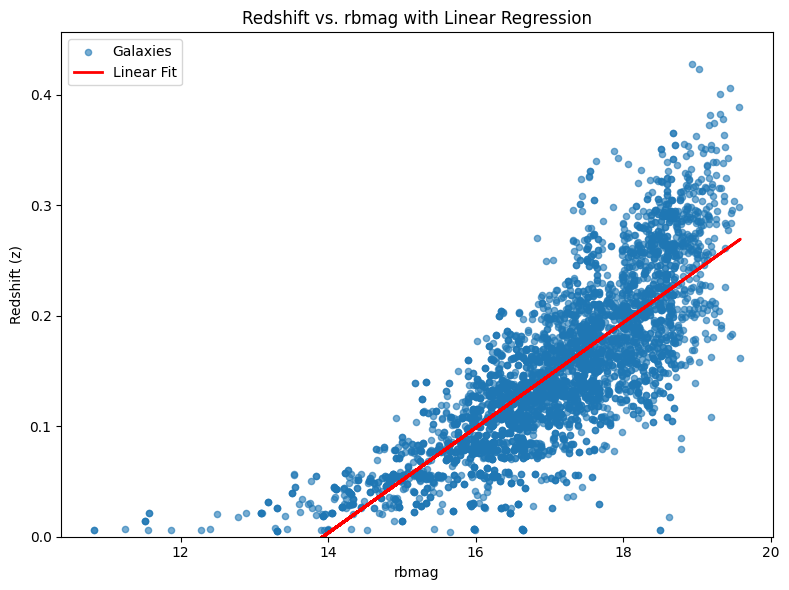

In [4]:
from astroquery.vizier import Vizier
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Убираем ограничение на количество строк
Vizier.ROW_LIMIT = -1

# Загружаем таблицу
catalog_id = "J/A+A/691/A6/tablea1"
result = Vizier.get_catalogs(catalog_id)
df = result[0].to_pandas()

# Находим нужные столбцы
z_col = next(col for col in df.columns if 'z' in col.lower())
rbmag_col = next(col for col in df.columns if 'rbmag' in col.lower())

# Очищаем от пропусков
data = df[[rbmag_col, z_col]].dropna()

# Разделим X и Y
X = data[[rbmag_col]].values  # нужно 2D для sklearn
y = data[z_col].values

# Построим линейную регрессию
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)


# Рисуем scatter и регрессию
plt.figure(figsize=(8, 6))
plt.scatter(X, y, s=20, alpha=0.6, label='Galaxies')
plt.plot(X, y_pred, color='red', linewidth=2, label='Linear Fit')
plt.xlabel('rbmag')
plt.ylabel('Redshift (z)')
plt.title('Redshift vs. rbmag with Linear Regression')
plt.ylim(bottom=0.0)  # <- вот здесь мы задаём начало оси Y с нуля
plt.legend()
plt.tight_layout()
plt.show()

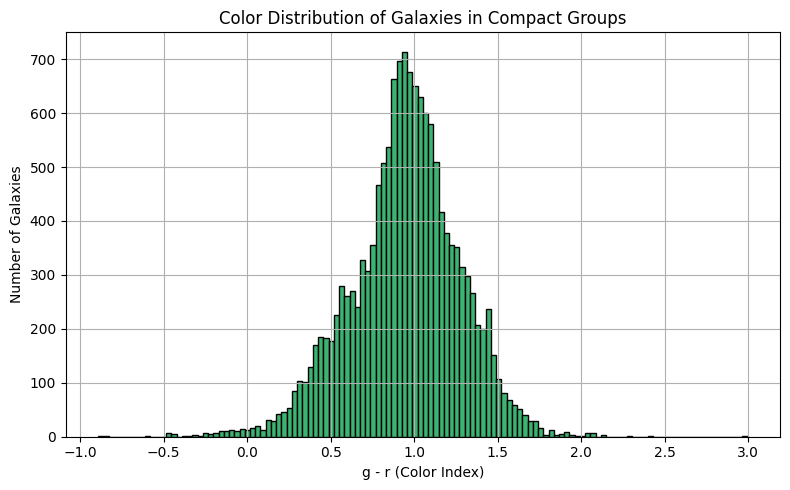

In [5]:
from astroquery.vizier import Vizier
import pandas as pd
import matplotlib.pyplot as plt

# Снимаем лимит строк
Vizier.ROW_LIMIT = -1

# Загружаем таблицу tablea2
catalog_id = "J/A+A/691/A6/tablea2"
result = Vizier.get_catalogs(catalog_id)
df = result[0].to_pandas()

# Удалим строки без gmag или rmag
df = df.dropna(subset=['gmag', 'rmag'])

# Вычисляем цветовой индекс
df['g_r'] = df['gmag'] - df['rmag']

# Строим гистограмму
plt.figure(figsize=(8, 5))
plt.hist(df['g_r'], bins='fd', color='mediumseagreen', edgecolor='black')
plt.xlabel('g - r (Color Index)')
plt.ylabel('Number of Galaxies')
plt.title('Color Distribution of Galaxies in Compact Groups')
plt.grid(True)
plt.tight_layout()
plt.show()

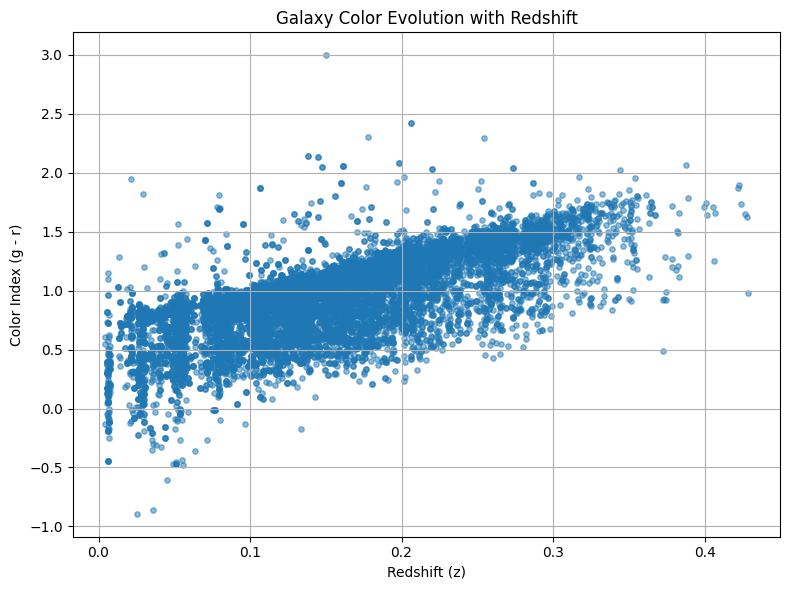

In [6]:
from astroquery.vizier import Vizier
import pandas as pd
import matplotlib.pyplot as plt

# Снимаем лимит
Vizier.ROW_LIMIT = -1

# Загружаем таблицу tablea2
catalog_id = "J/A+A/691/A6/tablea2"
result = Vizier.get_catalogs(catalog_id)
df = result[0].to_pandas()

# Фильтрация: нужны gmag, rmag и z
df = df.dropna(subset=['gmag', 'rmag', 'z'])

# Вычисляем цветовой индекс
df['g_r'] = df['gmag'] - df['rmag']

# Строим диаграмму
plt.figure(figsize=(8,6))
plt.scatter(df['z'], df['g_r'], s=15, alpha=0.5)
plt.xlabel('Redshift (z)')
plt.ylabel('Color Index (g - r)')
plt.title('Galaxy Color Evolution with Redshift')
plt.grid(True)
plt.tight_layout()
plt.show()

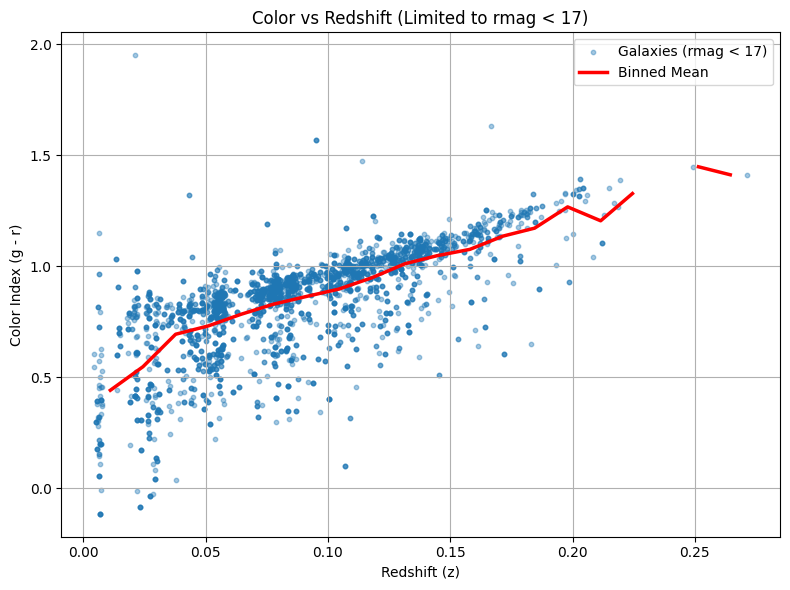

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from astroquery.vizier import Vizier
import pandas as pd

# Загрузка таблицы
Vizier.ROW_LIMIT = -1
catalog_id = "J/A+A/691/A6/tablea2"
result = Vizier.get_catalogs(catalog_id)
df = result[0].to_pandas()

# Очищаем от пропусков
df = df.dropna(subset=['gmag', 'rmag', 'z'])

# Вычисляем цветовой индекс
df['g_r'] = df['gmag'] - df['rmag']

# 🔻 Ограничение по яркости
df = df[df['rmag'] < 17]

# Биннинг по z
num_bins = 20
z_bins = np.linspace(df['z'].min(), df['z'].max(), num_bins + 1)
df['z_bin'] = pd.cut(df['z'], bins=z_bins)
bin_centers = [interval.mid for interval in df['z_bin'].cat.categories]
mean_g_r = df.groupby('z_bin')['g_r'].mean()

# Построение
plt.figure(figsize=(8,6))
plt.scatter(df['z'], df['g_r'], s=10, alpha=0.4, label='Galaxies (rmag < 17)')
plt.plot(bin_centers, mean_g_r, color='red', linewidth=2.5, label='Binned Mean')
plt.xlabel('Redshift (z)')
plt.ylabel('Color Index (g - r)')
plt.title('Color vs Redshift (Limited to rmag < 17)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

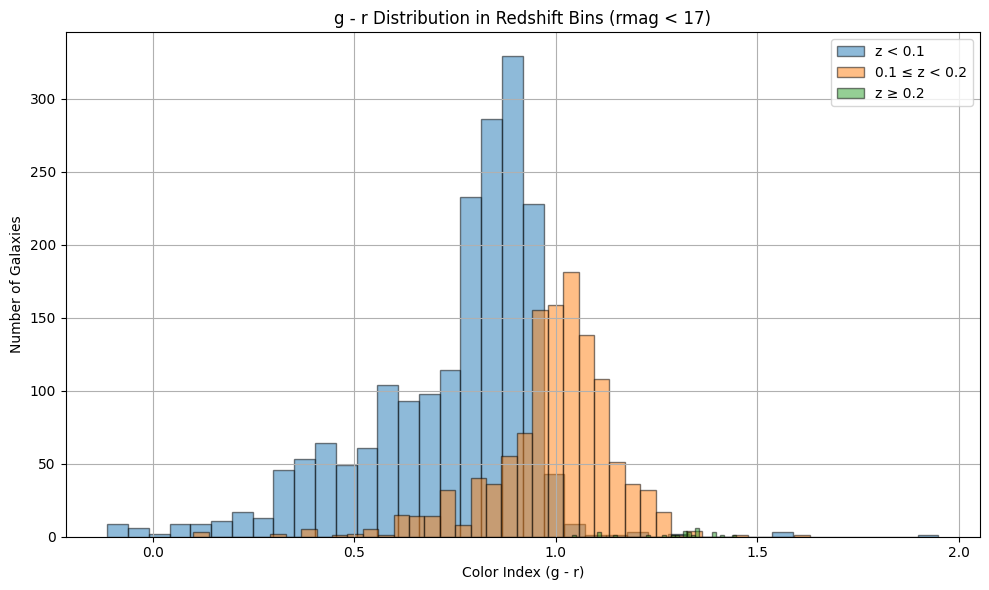

In [9]:
import matplotlib.pyplot as plt
from astroquery.vizier import Vizier
import pandas as pd

# Загрузка данных
Vizier.ROW_LIMIT = -1
catalog_id = "J/A+A/691/A6/tablea2"
result = Vizier.get_catalogs(catalog_id)
df = result[0].to_pandas()

# Удаляем пропуски
df = df.dropna(subset=['gmag', 'rmag', 'z'])
df['g_r'] = df['gmag'] - df['rmag']

# Ограничиваем по яркости
df = df[df['rmag'] < 17]

# Разделение по z
z_ranges = {
    'z < 0.1': df[df['z'] < 0.1],
    '0.1 ≤ z < 0.2': df[(df['z'] >= 0.1) & (df['z'] < 0.2)],
    'z ≥ 0.2': df[df['z'] >= 0.2]
}

# Построение гистограмм
plt.figure(figsize=(10, 6))

for label, subset in z_ranges.items():
    plt.hist(subset['g_r'], bins=40, alpha=0.5, label=label, edgecolor='black')

plt.xlabel('Color Index (g - r)')
plt.ylabel('Number of Galaxies')
plt.title('g - r Distribution in Redshift Bins (rmag < 17)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

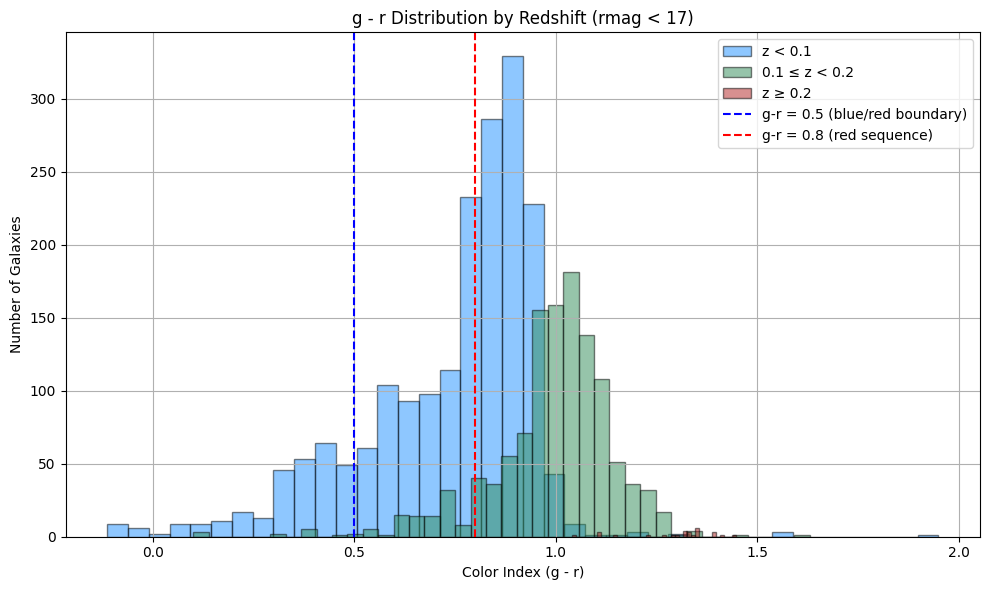

In [10]:
import matplotlib.pyplot as plt
from astroquery.vizier import Vizier
import pandas as pd

# Загрузка данных
Vizier.ROW_LIMIT = -1
catalog_id = "J/A+A/691/A6/tablea2"
result = Vizier.get_catalogs(catalog_id)
df = result[0].to_pandas()

# Вычисляем g - r и фильтруем
df = df.dropna(subset=['gmag', 'rmag', 'z', 'rmag'])
df['g_r'] = df['gmag'] - df['rmag']
df = df[df['rmag'] < 17]

# Разделение по z
z_ranges = {
    'z < 0.1': df[df['z'] < 0.1],
    '0.1 ≤ z < 0.2': df[(df['z'] >= 0.1) & (df['z'] < 0.2)],
    'z ≥ 0.2': df[df['z'] >= 0.2]
}

# Построение гистограмм
plt.figure(figsize=(10, 6))

colors = {
    'z < 0.1': 'dodgerblue',
    '0.1 ≤ z < 0.2': 'seagreen',
    'z ≥ 0.2': 'firebrick'
}

for label, subset in z_ranges.items():
    plt.hist(subset['g_r'], bins=40, alpha=0.5, label=label,
             color=colors[label], edgecolor='black')

# Добавляем вертикальные линии классификации
plt.axvline(0.5, color='blue', linestyle='--', label='g-r = 0.5 (blue/red boundary)')
plt.axvline(0.8, color='red', linestyle='--', label='g-r = 0.8 (red sequence)')

plt.xlabel('Color Index (g - r)')
plt.ylabel('Number of Galaxies')
plt.title('g - r Distribution by Redshift (rmag < 17)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

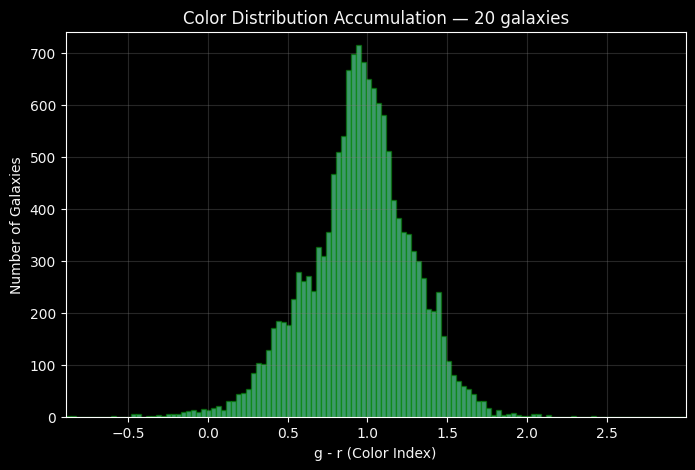

In [18]:
from astroquery.vizier import Vizier
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

# === ПАРАМЕТР: шаг добавления точек ===
STEP = 20  # можно увеличить до 50 или 100

# Загрузка таблицы
Vizier.ROW_LIMIT = -1
catalog_id = "J/A+A/691/A6/tablea2"
result = Vizier.get_catalogs(catalog_id)
df = result[0].to_pandas()

# Вычисляем цвет
df = df.dropna(subset=['gmag', 'rmag'])
df['g_r'] = df['gmag'] - df['rmag']
g_r_values = df['g_r'].values

# Бины как в оригинальной гистограмме
_, bin_edges = np.histogram(g_r_values, bins='fd')
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
bin_counts = np.zeros(len(bin_edges) - 1)

# === Настройка графики для тёмной темы ===
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(8, 5))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

# Цвета
text_color = 'whitesmoke'
grid_color = 'gray'
bar_color = (0.4, 1.0, 0.7, 0.5)  # полупрозрачная мятная зелень

def update(frame):
    ax.clear()
    start = frame * STEP
    end = min(len(g_r_values), (frame + 1) * STEP)
    new_data = g_r_values[start:end]
    inds = np.digitize(new_data, bin_edges) - 1

    for i in inds:
        if 0 <= i < len(bin_counts):
            bin_counts[i] += 1

    ax.bar(bin_centers, bin_counts, width=np.diff(bin_edges),
           color=bar_color, edgecolor='green', alpha=0.6)

    ax.set_xlabel('g - r (Color Index)', color=text_color)
    ax.set_ylabel('Number of Galaxies', color=text_color)
    ax.set_title(f'Color Distribution Accumulation — {end} galaxies', color=text_color)

    ax.set_xlim(bin_edges[0], bin_edges[-1])
    ax.set_ylim(0, 740)

    ax.tick_params(colors=text_color)
    ax.grid(True, color=grid_color, alpha=0.3)

# Количество кадров
num_frames = int(np.ceil(len(g_r_values) / STEP))

# Анимация
anim = FuncAnimation(fig, update, frames=num_frames, interval=30, repeat=False)

# Для Jupyter
# from IPython.display import HTML
# HTML(anim.to_jshtml())

anim.save("color_accumulation.mp4", writer="ffmpeg", fps=20)


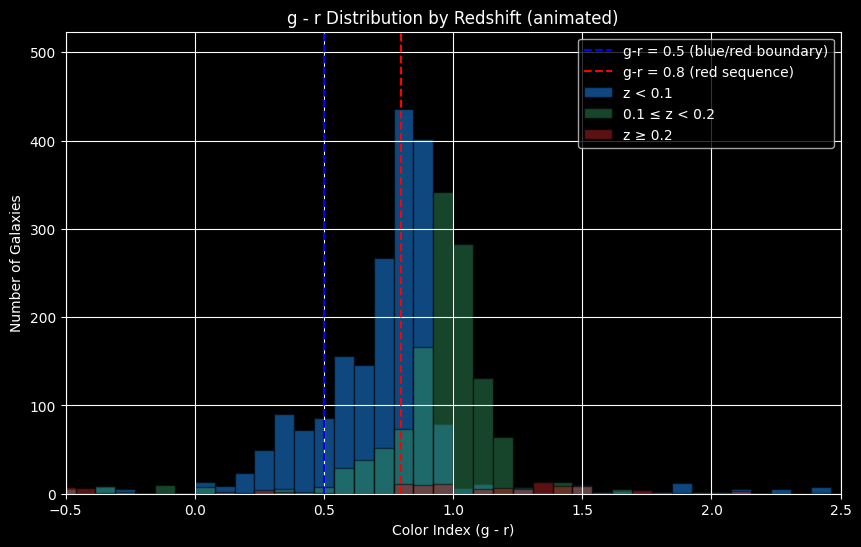

In [25]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from astroquery.vizier import Vizier
import pandas as pd
import numpy as np

# Загрузка таблицы
Vizier.ROW_LIMIT = -1
catalog_id = "J/A+A/691/A6/tablea2"
result = Vizier.get_catalogs(catalog_id)
df = result[0].to_pandas()

# Подготовка
df = df.dropna(subset=['gmag', 'rmag', 'z'])
df['g_r'] = df['gmag'] - df['rmag']
df = df[df['rmag'] < 17]

# Разделение по z
z_ranges = {
    'z < 0.1': df[df['z'] < 0.1],
    '0.1 ≤ z < 0.2': df[(df['z'] >= 0.1) & (df['z'] < 0.2)],
    'z ≥ 0.2': df[df['z'] >= 0.2]
}

colors = {
    'z < 0.1': 'dodgerblue',
    '0.1 ≤ z < 0.2': 'seagreen',
    'z ≥ 0.2': 'firebrick'
}

# Общие бины
bins = np.linspace(-0.5, 2.5, 40)

# Предрасчёт оригинальных гистограмм
hist_data = {label: np.histogram(subset['g_r'], bins=bins)[0]
             for label, subset in z_ranges.items()}

# Подготовка фигуры
fig, ax = plt.subplots(figsize=(10, 6))
bar_containers = {}

# Первоначальный график
for label, counts in hist_data.items():
    bar_containers[label] = ax.bar(bins[:-1], counts, width=np.diff(bins), alpha=0.5,
                                    label=label, color=colors[label], edgecolor='black')

# Вертикальные линии
vline1 = ax.axvline(0.5, color='blue', linestyle='--', label='g-r = 0.5 (blue/red boundary)')
vline2 = ax.axvline(0.8, color='red', linestyle='--', label='g-r = 0.8 (red sequence)')

# Оси
ax.set_xlim(-0.5, 2.5)
ax.set_ylim(0, max([max(c) for c in hist_data.values()]) * 1.2)
ax.set_xlabel('Color Index (g - r)')
ax.set_ylabel('Number of Galaxies')
ax.set_title('g - r Distribution by Redshift (animated)')
ax.legend()
ax.grid(True)

# Анимация
def update(frame):
    for label, bars in bar_containers.items():
        original = hist_data[label]
        noise = np.random.normal(loc=0, scale=6, size=original.shape)
        noisy = np.clip(original + noise, 0, None)
        for bar, height in zip(bars, noisy):
            bar.set_height(height)

anim = FuncAnimation(fig, update, frames=300, interval=300, repeat=False)

# Для Jupyter
from IPython.display import HTML
HTML(anim.to_jshtml())

anim.save("color_simulation.mp4", writer="ffmpeg", fps=20)


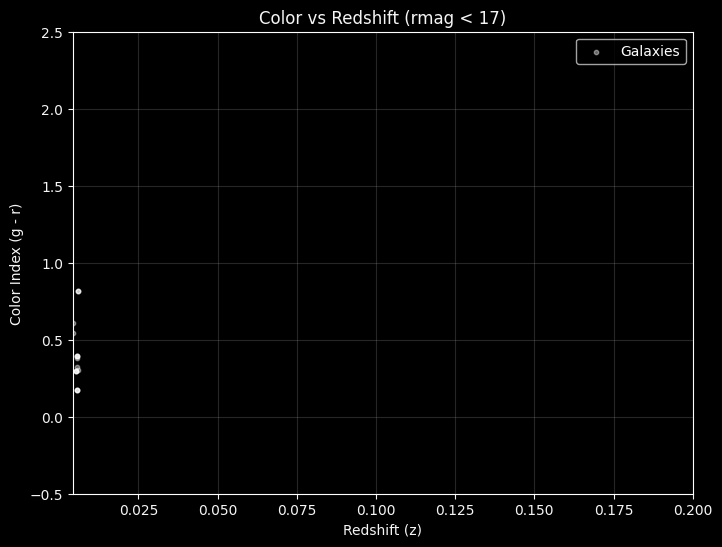

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from astroquery.vizier import Vizier
import pandas as pd
import warnings

# 🔇 Отключаем все предупреждения
warnings.filterwarnings('ignore')

# === Настройки ===
STEP = 20             # сколько точек добавляется за кадр
DURATION_MS = 15000   # общая длительность анимации
INTERVAL = 80        # мс между кадрами

# === Загрузка таблицы из VizieR ===
Vizier.ROW_LIMIT = -1
catalog_id = "J/A+A/691/A6/tablea2"
result = Vizier.get_catalogs(catalog_id)
df = result[0].to_pandas()

# === Подготовка данных ===
df = df.dropna(subset=['gmag', 'rmag', 'z'])
df['g_r'] = df['gmag'] - df['rmag']
df = df[df['rmag'] < 17].sort_values('z').reset_index(drop=True)

# Бины по z для сглаженной средней
num_bins = 20
z_bins = np.linspace(df['z'].min(), df['z'].max(), num_bins + 1)
z_bin_labels = pd.IntervalIndex.from_breaks(z_bins)
z_bin_centers = z_bin_labels.mid

# === Настройка графики (чёрная тема) ===
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(8, 6))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

# Пустой scatter и линия
scatter_plot = ax.scatter([], [], s=10, alpha=0.4, label='Galaxies', color='white')
(mean_line,) = ax.plot([], [], color='red', linewidth=2.5)  # без label

# Оформление осей и сетки
ax.set_xlim(df['z'].min(), 0.2)  # Ограничиваем ось X до z=0.2
ax.set_ylim(-0.5, 2.5)
ax.set_xlabel('Redshift (z)', color='whitesmoke')
ax.set_ylabel('Color Index (g - r)', color='whitesmoke')
ax.set_title('Color vs Redshift (rmag < 17)', color='whitesmoke')
ax.tick_params(colors='whitesmoke')
ax.grid(True, color='gray', alpha=0.3)
ax.legend()

# === Функция обновления ===
def update(frame):
    end = min(len(df), (frame + 1) * STEP)
    sub = df.iloc[:end].copy()

    # Обновляем точки
    scatter_plot.set_offsets(np.c_[sub['z'], sub['g_r']])

    # Обновляем среднюю линию
    sub['z_bin'] = pd.cut(sub['z'], bins=z_bins)
    mean_per_bin = sub.groupby('z_bin')['g_r'].mean()
    mean_per_bin = mean_per_bin.reindex(z_bin_labels)
    mean_line.set_data(z_bin_centers, mean_per_bin.values)

# === Анимация ===
num_frames = DURATION_MS // INTERVAL
anim = FuncAnimation(fig, update, frames=num_frames, interval=INTERVAL, repeat=False)

# === Для Jupyter Notebooks ===
# from IPython.display import HTML
HTML(anim.to_jshtml())

anim.save("scatter.mp4", writer="ffmpeg", fps=20)
